In [5]:
'''
Importing required libraries for computer vision 01
'''

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
'''
Loading an image [Modo monocromático - un canal]
'''

# Carga de la imagen
img = cv.imread('imgBloque1.bmp', cv.IMREAD_GRAYSCALE)
# Dimension de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (480, 640) pix
[[ 62  62  61 ... 255 222 176]
 [ 62  62  61 ... 255 222 176]
 [ 61  61  60 ... 255 219 173]
 ...
 [ 68  68  69 ... 100 101 102]
 [ 67  67  67 ... 103 103 102]
 [ 66  66  66 ... 108 105 103]]


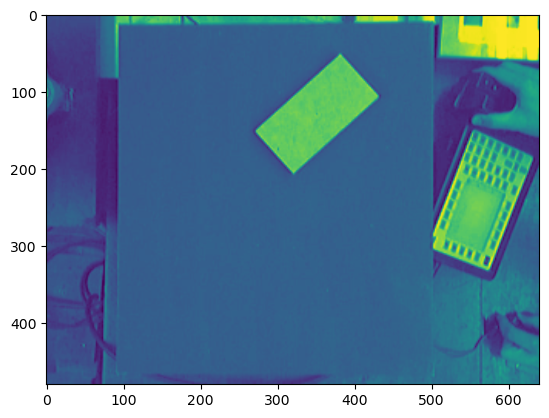

In [7]:
# Mostrar la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

In [ ]:
# Visualizar la imagen con OpenCV
cv.imshow('Imagen', img)
cv.waitKey(0)
cv.destroyAllWindows()

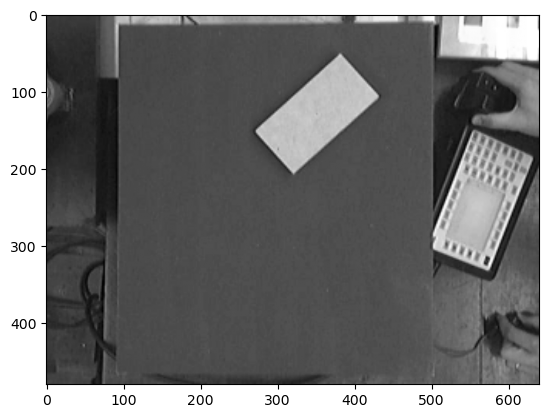

In [10]:
# Visualizar la imagen con tonos de grises
plt.imshow(img, cmap='gray')
plt.show()

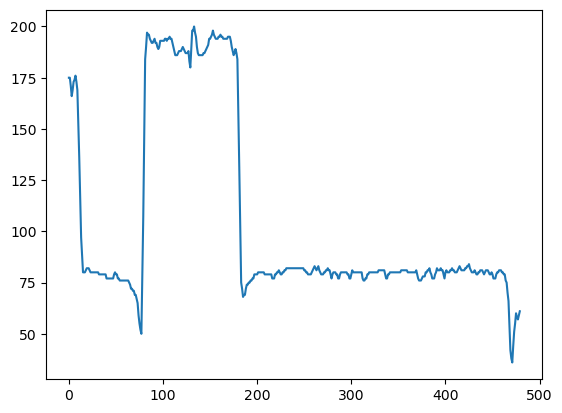

In [11]:
# Revisar un perfil. Es decir, la intensidad a lo largo de la columna, por ejemplo, 350.

perfil = img[:,350]
plt.plot(perfil)
plt.show()

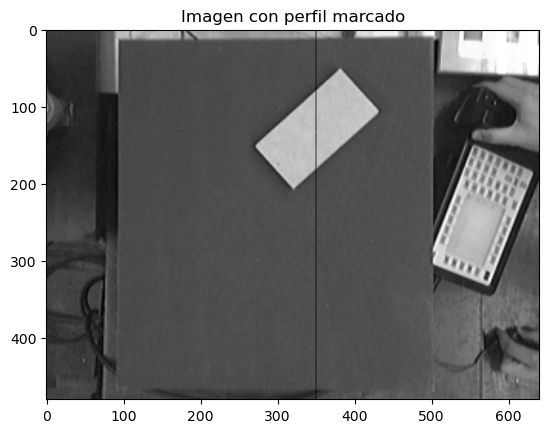

In [12]:
# Hacer una marca en la imagen para indicar la linea que usamos para tomar el perfil.
img_anotada = img.copy()
img_anotada[:,350] = 0  # Marcar la columna 350 en negro
plt.figure()
plt.imshow(img_anotada, cmap='gray')
plt.title('Imagen con perfil marcado')
plt.show()

Tamaño imagen color: (480, 640, 3)


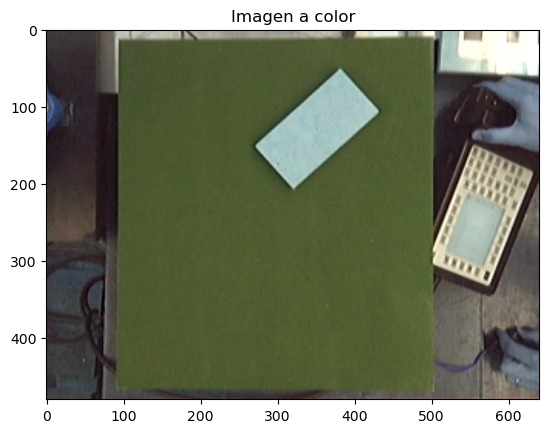

In [15]:
# Ver la imagen como imagen a color

img_color = cv.imread('imgBloque1.bmp')
# print(img_color) -- muestra las matrices de los canales BGR
# Dimension de la imagen
print(f'Tamaño imagen color: {img_color.shape}')
plt.imshow(img_color)
plt.title('Imagen a color')
plt.show()

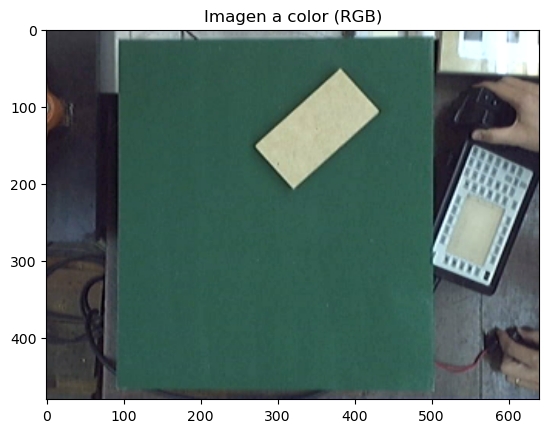

In [16]:
# Pasar la palete de imagenes de BRG a RGB
img_color_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(img_color_rgb)
plt.title('Imagen a color (RGB)')
plt.show()

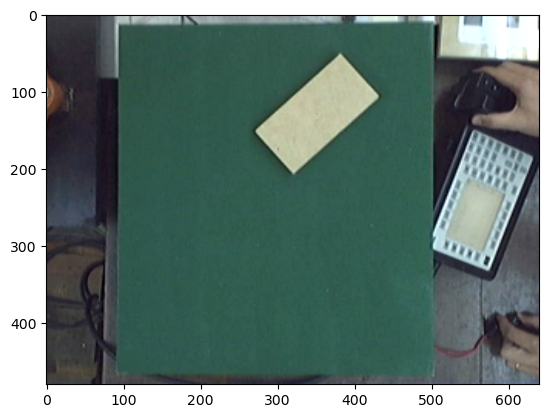

In [17]:
# Invertir el orden de los canales

imgRGB = img_color[:, :, ::-1]
plt.imshow(imgRGB)
plt.show()


[[ 62  62  61 ... 255 218 172]
 [ 62  62  61 ... 255 218 172]
 [ 61  61  60 ... 255 215 169]
 ...
 [ 68  68  69 ...  90  91  92]
 [ 67  67  67 ...  92  93  92]
 [ 66  66  66 ...  97  95  93]]
Canal rojo


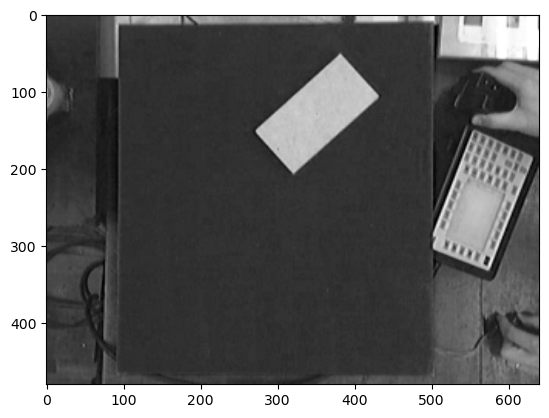

Canal verde


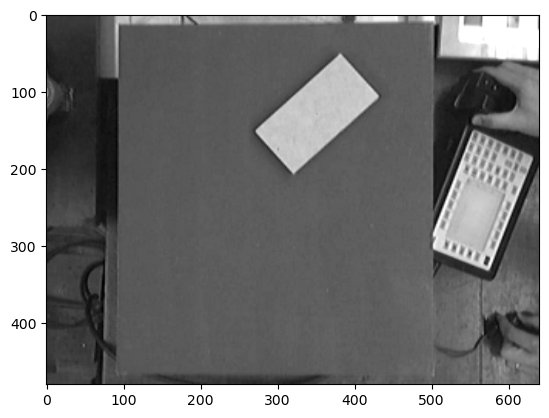

Canal azul


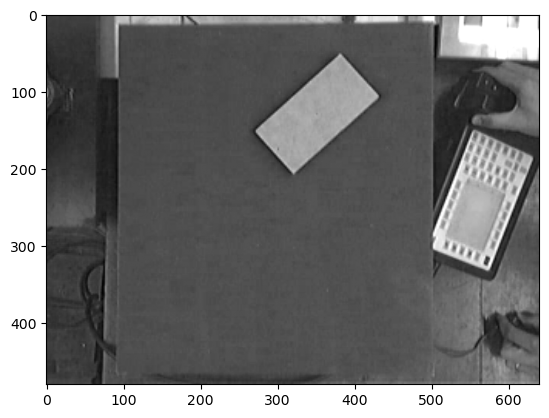

In [19]:
#Quiero desensamblar los canales para trabajarlos por separado

im_r, im_g, im_b = cv.split(imgRGB)
print(im_r)
print('Canal rojo')
plt.imshow(im_r, cmap='gray')
plt.show()
print('Canal verde')
plt.imshow(im_g, cmap='gray')
plt.show()
print('Canal azul')
plt.imshow(im_b, cmap='gray')
plt.show()

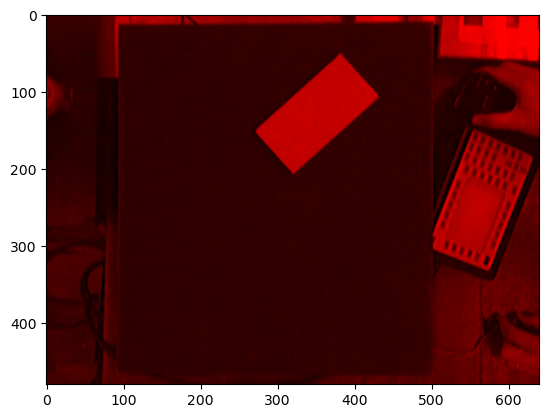

In [25]:
# Vamos a eliminar un plano y reconstruimos la imagen
imgRGB2 = cv.merge((im_r, im_g* 0, im_b* 0))

plt.imshow(imgRGB2)
plt.show()

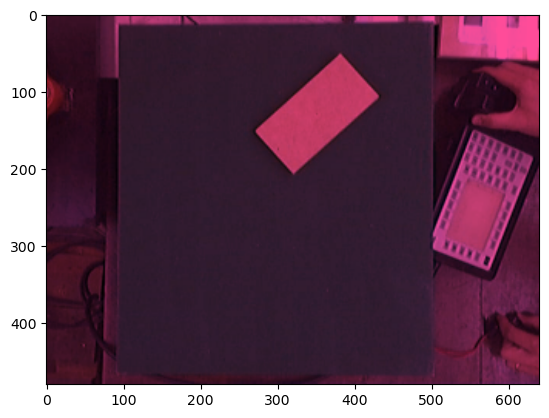

In [28]:
# Vamos a componer la imagen color con distintos pesos en los canales
# Notar el uso de uint8 !!
imgRGB2 = cv.merge((im_r, np.uint8(im_g*0.3), np.uint8(im_b*0.6)))
plt.imshow(imgRGB2)
plt.show()

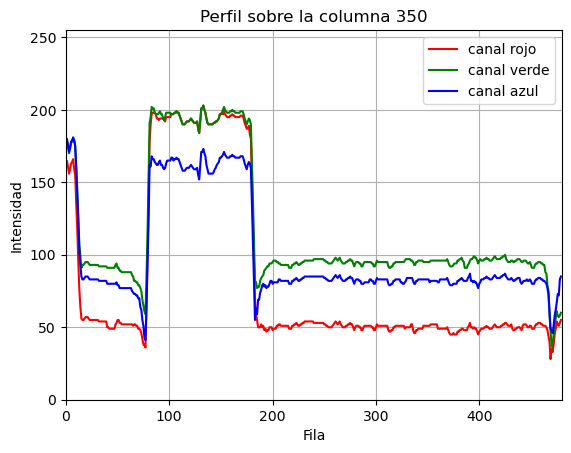

In [29]:
idx_col = 350
perfil_color = imgRGB[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal rojo')
plt.plot(perfil_color[:,1], color='g', label='canal verde')
plt.plot(perfil_color[:,2], color='b', label='canal azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 480)
plt.ylim(0, 255)
plt.legend()
plt.show()

In [31]:
# Guardamos la imagen modificada
# Verificar cómo quedaron los colores y tratar de explicar qué pasó
cv.imwrite('modificada.png', imgRGB2)

True

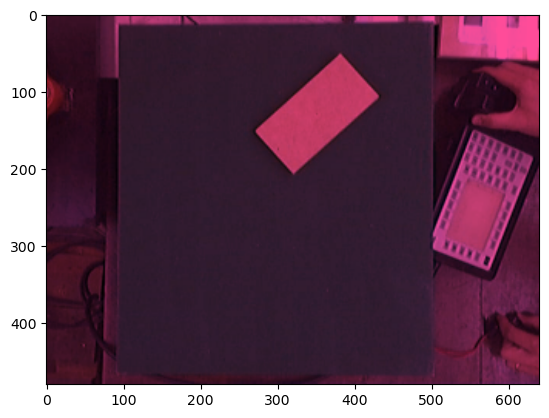

In [32]:
img_modificada = cv.imread('modificada.png')
plt.imshow(img_modificada)